In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import requests

In [30]:
%matplotlib inline

In [5]:
url = 'https://datos.covid-19.conacyt.mx/Downloads/Files/Casos_Diarios_Estado_Nacional_Confirmados_20210128.csv'

In [6]:
r = requests.get(url,allow_redirects=True, stream = True)

In [7]:
url_content = r.content

In [8]:
csv_file = open('datoscovid.csv','wb')
csv_file.write(url_content)
csv_file.close()

In [9]:
datos = pd.read_csv("datoscovid.csv")

In [11]:
datos.head()

,cve_ent,poblacion,nombre,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,...,19-01-2021,20-01-2021,21-01-2021,22-01-2021,23-01-2021,24-01-2021,25-01-2021,26-01-2021,27-01-2021,28-01-2021
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,202,214,205,154,34,27,233,143,106,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,208,198,201,166,57,45,151,171,118,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,271,224,215,254,115,49,258,174,33,1
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,30,22,31,23,15,9,20,11,6,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,38,39,30,28,10,11,23,12,5,0


In [15]:
distrito = datos[datos['nombre']=='DISTRITO FEDERAL']

In [17]:
type(distrito)

pandas.core.frame.DataFrame

In [18]:
dfllista = list(distrito.iloc[0,:])

In [22]:
historial = np.asarray(dfllista[3:])

In [25]:
tiempo_en_dias = np.arange(0.0,len(historial),1)

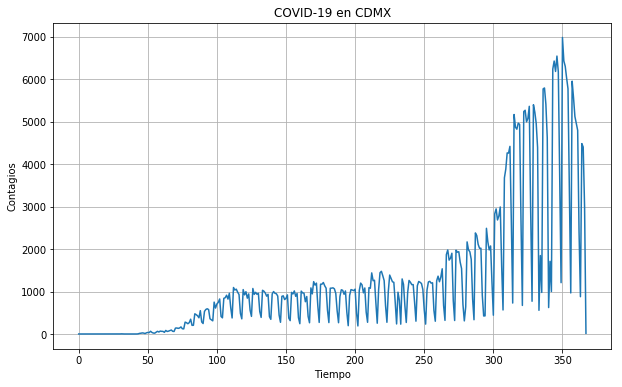

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot( tiempo_en_dias,historial)
ax.set(xlabel='Tiempo',ylabel='Contagios',title='COVID-19 en CDMX')
ax.grid()
plt.show()

In [33]:
gdfEstados = gpd.read_file('mapa/')

In [35]:
gdfEstados = gdfEstados.to_crs({'init':'epsg:4326'})

/home/rene/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [36]:
gdfEstados.head()

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry
0,6.710632,22.081488,2,1,BAJA CALIFORNIA,Mexicali,None,02,"POLYGON ((-116.15195 32.61459, -116.13523 32.6..."
1,16.687178,36.642330,3,2,SONORA,Hermosillo,None,26,"POLYGON ((-114.81361 32.49456, -114.81306 32.4..."
2,0.000045,0.032972,4,3,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.29441 32.43412, -117.29514 32.4..."
3,0.000004,0.008558,5,4,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.26293 32.42339, -117.26320 32.4..."
4,0.000012,0.021596,6,5,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.25951 32.41480, -117.25991 32.4..."


In [44]:
result = pd.merge(gdfEstados,datos,how='left',left_on='intedo',right_on='cve_ent')

In [43]:
gdfEstados['intedo']=gdfEstados['NUM_EDO'].astype(str).astype(float)

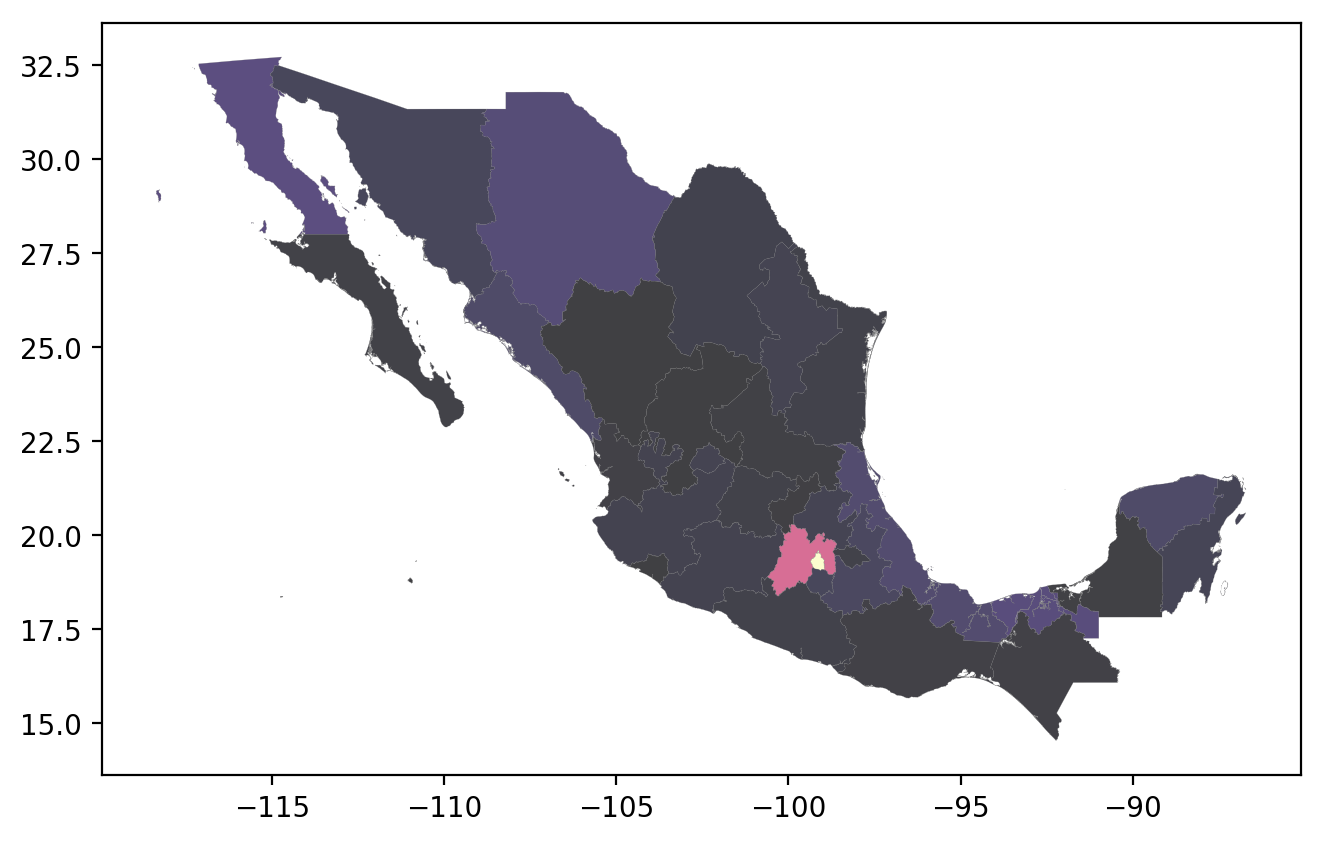

In [49]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = plt.subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)



result.plot(ax=ax,column='30-04-2020', cmap='magma', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)


In [48]:
datos.columns

Index(['cve_ent', 'poblacion', 'nombre', '27-01-2020', '28-01-2020',
       '29-01-2020', '30-01-2020', '31-01-2020', '01-02-2020', '02-02-2020',
       ...
       '19-01-2021', '20-01-2021', '21-01-2021', '22-01-2021', '23-01-2021',
       '24-01-2021', '25-01-2021', '26-01-2021', '27-01-2021', '28-01-2021'],
      dtype='object', length=371)